# Motion Capture Data Analysis - NM12

## Libraries
Installing and importing libraries for data processing, sound analysis and visualization. 

In [239]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install librosa #Sound analysis

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [240]:
!{sys.executable} -m pip install chart_studio  #Librosa plots

You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [253]:
!{sys.executable} -m pip install numba

  Using cached https://files.pythonhosted.org/packages/ac/7d/e01bcbf4a35cbb07ce04aaa545030bde231331aaabe7c44726b099f8fd86/numba-0.49.1-cp36-cp36m-macosx_10_14_x86_64.whl
  Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0
You are using pip version 19.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [254]:
import numba

In [2]:
import pandas as pd
import numpy as np
#import librosa
#import librosa.display
import matplotlib
import random
%matplotlib inline
import csv
import glob
import os
import matplotlib.pyplot as plt
import math
import sys
import pylab
import numpy.linalg
import chart_studio

%load_ext rpy2.ipython

#r packages
from rpy2.robjects import r
from rpy2.robjects.packages import importr
from rpy2.robjects import FloatVector
stats = importr('stats')
base = importr('base')

from scipy import stats
import seaborn
from IPython.display import display, Markdown


## Reading Motion Capture Data into Pandas Dataframes

In [58]:
#Reading QTOM generated tsv files (one for each group of participants) from local drive

nm12raw = {}

path = r'/Users/vesanche/Desktop/IMV UiO/NM/NM12_tsv/' # use your path for the folder containing mocap files
nm_files = sorted(glob.glob(os.path.join(path, "*.tsv")))

i=1

for filename in nm_files:
    nm12raw[i] = pd.read_csv(filename, delimiter='\t', encoding='utf-8', skiprows=10, low_memory=False)
    nm12raw[i].drop(nm12raw[i].columns[len(nm12raw[i].columns)-1], axis=1, inplace=True)
    i = i+1



In [60]:
#Example: Group8. All participants. First correspond to the reference markers placed on static tripods
nm12raw[8]


,static X,static Y,static Z,s1 X,s1 Y,s1 Z,s2 X,s2 Y,s2 Z,s3 X,...,s9 Z,s10 X,s10 Y,s10 Z,s11 X,s11 Y,s11 Z,s12 X,s12 Y,s12 Z
0,1292.317,1031.940,1785.602,137.628,1746.671,1732.122,942.397,1780.328,1789.612,1759.089,...,1716.486,860.777,140.779,1728.157,1654.980,163.832,1671.018,2473.893,272.276,1754.657
1,1292.317,1031.943,1785.599,137.620,1746.712,1732.113,942.398,1780.313,1789.625,1759.114,...,1716.483,860.800,140.713,1728.165,1654.989,163.842,1671.021,2473.916,272.377,1754.641
2,1292.312,1031.945,1785.602,137.610,1746.759,1732.128,942.381,1780.294,1789.644,1759.124,...,1716.501,860.817,140.650,1728.170,1654.978,163.840,1671.017,2473.927,272.484,1754.631
3,1292.301,1031.950,1785.618,137.593,1746.834,1732.171,942.386,1780.261,1789.669,1759.150,...,1716.511,860.800,140.585,1728.164,1654.966,163.842,1671.014,2473.937,272.575,1754.634
4,1292.313,1031.944,1785.616,137.569,1746.871,1732.176,942.384,1780.206,1789.672,1759.189,...,1716.516,860.791,140.522,1728.178,1654.983,163.814,1671.029,2473.944,272.661,1754.625
5,1292.315,1031.931,1785.617,137.567,1746.931,1732.178,942.393,1780.147,1789.665,1759.193,...,1716.503,860.789,140.444,1728.174,1655.009,163.781,1671.018,2473.946,272.745,1754.617
6,1292.322,1031.930,1785.606,137.574,1746.986,1732.178,942.412,1780.079,1789.651,1759.228,...,1716.507,860.796,140.360,1728.170,1654.990,163.758,1671.012,2473.936,272.844,1754.618
7,1292.316,1031.941,1785.607,137.581,1747.046,1732.185,942.399,1780.011,1789.639,1759.245,...,1716.484,860.769,140.313,1728.169,1654.991,163.725,1670.997,2473.933,272.920,1754.603
8,1292.318,1031.933,1785.594,137.595,1747.106,1732.209,942.412,1779.963,1789.621,1759.256,...,1716.496,860.762,140.248,1728.174,1654.974,163.691,1671.000,2473.938,273.001,1754.602
9,1292.316,1031.936,1785.603,137.619,1747.173,1732.223,942.415,1779.902,1789.636,1759.275,...,1716.497,860.721,140.169,1728.189,1654.990,163.642,1671.000,2473.927,273.069,1754.601


## Extracting individuals from groups and nesting in dictionaries

In [61]:
nm12 = {}
Fs = 100 #sampling frequency of the Mocap system during NM12 (fps)    
num_groups = len(nm12raw)
    

for g_id in range(1,num_groups+1):
    nm12[g_id] = {}
    j = 0
    k = 0
    for i in range (3,len(nm12raw[g_id].columns)+3,3):
        j = j+1
        nm12[g_id][j] = nm12raw[g_id].iloc[:,k:i:1]
        nm12[g_id][j].columns = ['X', 'Y', 'Z']
        time = np.linspace(0, len(nm12raw[g_id])/Fs, len(nm12raw[g_id]))
        nm12[g_id][j].insert(0, 'Time (s)', time)
        k = k+3

In [63]:
nm12[8][2] #data from group 8, marker 2 with time column

,Time (s),X,Y,Z
0,0.000000,137.628,1746.671,1732.122
1,0.010000,137.620,1746.712,1732.113
2,0.020001,137.610,1746.759,1732.128
3,0.030001,137.593,1746.834,1732.171
4,0.040001,137.569,1746.871,1732.176
5,0.050001,137.567,1746.931,1732.178
6,0.060002,137.574,1746.986,1732.178
7,0.070002,137.581,1747.046,1732.185
8,0.080002,137.595,1747.106,1732.209
9,0.090003,137.619,1747.173,1732.223


## Calculating variables for analysis (displacement, velocity, quantity of motion)

### Calculating displacement (change of position)

In [69]:
def displacement(position):

    displacement = (
        np.roll(position, -1, axis=0)
        - position)
    displacement = displacement.drop(displacement.index[len(displacement)-1])
    
    displacement.index =  position['Time (s)'][1:]
    
    return displacement


In [70]:
displacements = {}    

for groups in range(1,num_groups+1):
    displacements[groups] = {}
    
    for i in range(1,len(nm12[groups]) + 1):
        displacements[groups][i] = displacement(nm12[groups][i])
        displacements[groups][i]['timestep (s)'] = displacements[groups][i]['Time (s)']
        displacements[groups][i] = displacements[groups][i].drop(['Time (s)'], axis=1)
        

In [66]:
displacements[8][2] #displacement for group 8, marker 2

,X,Y,Z,timestep (s)
Time (s),,,,
0.010000,-0.008,0.041,-0.009,0.01
0.020001,-0.010,0.047,0.015,0.01
0.030001,-0.017,0.075,0.043,0.01
0.040001,-0.024,0.037,0.005,0.01
0.050001,-0.002,0.060,0.002,0.01
0.060002,0.007,0.055,0.000,0.01
0.070002,0.007,0.060,0.007,0.01
0.080002,0.014,0.060,0.024,0.01
0.090003,0.024,0.067,0.014,0.01


### Plotting displacement


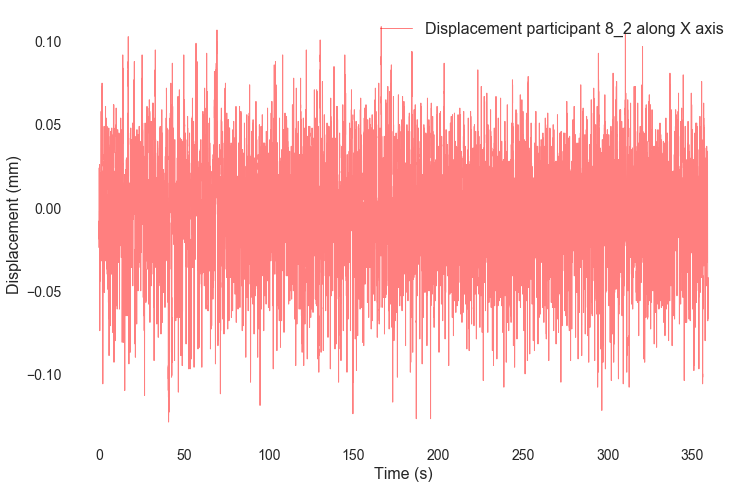

In [71]:
fig5, ax5 = plt.subplots(1)
fig5.set_figheight(8)
fig5.set_figwidth(12)
ax5.set_facecolor("white")
ax5.plot(displacements[8][2]['X'], lw=1, label='Displacement participant 8_2 along X axis', color='red', alpha=0.5) #Displacement on x axis

plt.tick_params(axis='both', which='major', labelsize=14)
ax5.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Displacement (mm)', fontsize=16);

### Calculating norm of displacement

In [72]:
def disp_norm(displacement):
  
       
    dispnorm = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    )
    
    return pd.DataFrame({
        'Norm of Displacement': dispnorm,
    })

In [73]:
disp_norms = {}    

for groups in range(1,num_groups+1):
    disp_norms[groups] = {}
    
    for i in range(1,len(nm12[groups])+1):
        disp_norms[groups][i] = disp_norm(displacements[groups][i])

In [51]:
disp_norms[8][2]

,Norm of Displacement
Time (s),
0.010000,0.042732
0.020001,0.050339
0.030001,0.088108
0.040001,0.044385
0.050001,0.060067
0.060002,0.055444
0.070002,0.060811
0.080002,0.066121
0.090003,0.072533


### Distance travelled
Cummulative distance travelled

In [74]:
#Concatenating norm of displacement for all participants in each group
disp_norms_group = {}
for group_id in range (1,num_groups+1):
    disp_norms_group[group_id] = pd.concat(disp_norms[group_id],1)
   
    

In [75]:
disp_norms_group[8]

,1,2,3,4,5,6,7,8,9,10,11
,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement,Norm of Displacement
Time (s),,,,,,,,,,,
0.010000,0.004243,0.042732,0.019875,0.045717,0.026907,0.101912,0.054818,0.007810,0.070349,0.013784,0.104814
0.020001,0.006164,0.050339,0.031796,0.043278,0.012689,0.091285,0.057385,0.021726,0.065445,0.011874,0.108028
0.030001,0.020050,0.088108,0.041701,0.039812,0.027749,0.104293,0.067476,0.026000,0.067454,0.012530,0.091597
0.040001,0.013565,0.044385,0.055118,0.052412,0.017029,0.083144,0.034496,0.025100,0.065161,0.036028,0.086753
0.050001,0.013191,0.060067,0.060092,0.029950,0.051585,0.080610,0.025140,0.013964,0.078128,0.043428,0.084404
0.060002,0.013077,0.055444,0.071979,0.058352,0.042825,0.078416,0.026552,0.035157,0.084386,0.030430,0.099509
0.070002,0.012570,0.060811,0.070264,0.040620,0.054378,0.076407,0.038341,0.024062,0.054213,0.036263,0.077524
0.080002,0.015395,0.066121,0.052887,0.044396,0.040804,0.067186,0.076322,0.018138,0.065567,0.038131,0.081160


Text(0.5, 1.0, 'Distance travelled for all participants and reference markers, Group 8')

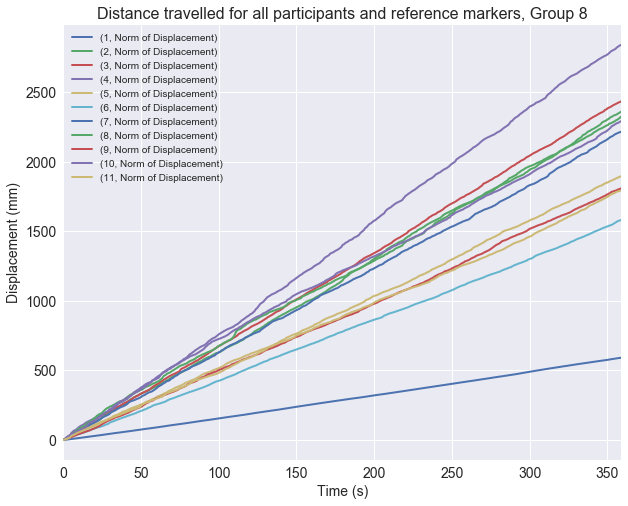

In [77]:
disp_norms_group[8].cumsum().plot(figsize=(10,8), linewidth=2, fontsize=14) #Indicate group number to plot
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Displacement (mm)', fontsize=14);
plt.legend(loc='upper left', fontsize=10)
plt.title('Distance travelled for all participants and reference markers, Group 8', fontsize=16)

### Plotting the planar displacement

(array([1790., 1800., 1810., 1820., 1830., 1840., 1850., 1860.]),
 <a list of 8 Text yticklabel objects>)

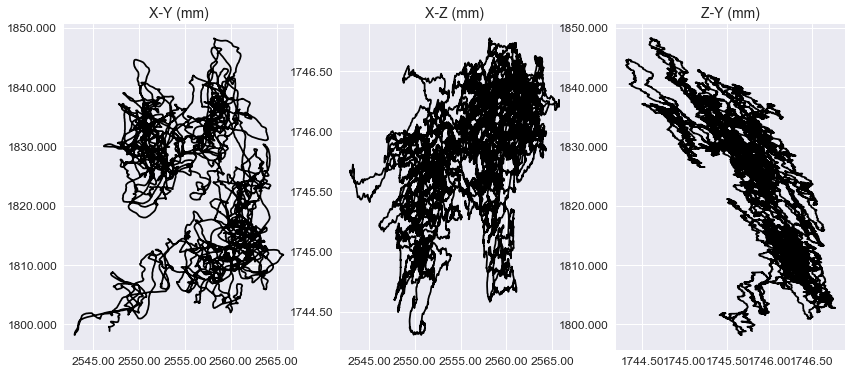

In [78]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(14,6))
aa = plt.subplot(1, 3, 1)
plt.plot(nm12[1][5]['X'], nm12[1][5]['Y'], color='k') #XY plane participant 5, group 1
plt.title('X-Y (mm)', fontsize=14)
aa.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
aa.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ab = plt.subplot(1, 3, 2)
plt.plot(nm12[1][5]['X'], nm12[1][5]['Z'], color='k') #XZ plane participant 5, group 1
plt.title('X-Z (mm)', fontsize=14)
ab.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ab.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ac = plt.subplot(1, 3, 3)
plt.plot(nm12[1][5]['Z'], nm12[1][5]['Y'], color='k') #ZY plane participant 5, group 1
plt.title('Z-Y (mm)', fontsize=14)
ac.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ac.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


#fig.savefig("paths.pdf", bbox_inches='tight')

### Calculating velocity in X, Y, and Z directions
Defining and running functions to calculate velocity

In [79]:
def x_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel X': vel,
    })

In [80]:
def y_vel(displacement):
   
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Y ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel Y': vel,
    })

In [81]:
def z_vel(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.Z ** 2) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Vel Z': vel,
    })

In [82]:

velx = {} #anterior-posterior (AP)
vely = {} #mediolateral (ML)
velz = {} #vertical (SI)

for groups in range(1,num_groups+1):
    velx[groups] = {}
    vely[groups] = {}
    velz[groups] = {}
    
    for i in range(1,len(nm12[groups])+1):
        velx[groups][i] = x_vel(displacements[groups][i])
        vely[groups][i] = y_vel(displacements[groups][i])
        velz[groups][i] = z_vel(displacements[groups][i])

In [83]:
velx[8][2] #velocity in the AP direction for participant 8_2

,Vel X
Time (s),
0.010000,0.799978
0.020001,0.999972
0.030001,1.699953
0.040001,2.399933
0.050001,0.199994
0.060002,0.699981
0.070002,0.699981
0.080002,1.399961
0.090003,2.399933


### Calculating norm of velocity (QoM)

In [84]:
def velocity_norm(displacement):
    
    #displacement = displacement.drop(displacement.index)
    
    vel = np.sqrt(
         displacement.X ** 2 +
         displacement.Y ** 2 +
         displacement.Z ** 2
    ) /  displacement['timestep (s)']
    
    return pd.DataFrame({
        'Velocity': vel,
    })
       

In [86]:
velocities = {}    

for groups in range(1,num_groups+1):
    velocities[groups] = {}
    
    for i in range(1,len(nm12[groups])+1):
        velocities[groups][i] = velocity_norm(displacements[groups][i])

In [87]:
velocities[8][2] #displaying velocity (QoM) for group 8, participant 2

,Velocity
Time (s),
0.010000,4.273053
0.020001,5.033745
0.030001,8.810543
0.040001,4.438345
0.050001,6.006496
0.060002,5.544212
0.070002,6.080949
0.080002,6.611926
0.090003,7.253073


In [88]:
#Concatenating velocities for all participants in each group
vels_group = {}
velsx_group = {}
velsy_group = {}
velsz_group = {}

for group_id in range(1,num_groups+1):
    vels_group[group_id] = pd.concat(velocities[group_id],1)
    velsx_group[group_id] = pd.concat(velx[group_id],1)
    velsy_group[group_id] = pd.concat(vely[group_id],1)
    velsz_group[group_id] = pd.concat(velz[group_id],1)
    
    ID_group = list(range(1,(len(vels_group[group_id].columns)+1)))
    
    vels_group[group_id].columns = ID_group
    velsx_group[group_id].columns = ID_group
    velsy_group[group_id].columns = ID_group
    velsz_group[group_id].columns = ID_group

In [89]:
vels_group[1] #QoM

,1,2,3,4,5,6,7,8,9
Time (s),,,,,,,,,
0.010000,1.726220,14.408625,4.361071,5.225752,6.267999,9.571045,1.923485,10.808955,5.671703
0.020001,1.532928,14.412788,4.287071,7.303221,6.365355,9.330336,2.362137,7.541674,3.925448
0.030001,2.149359,12.974230,3.890907,8.584632,9.033574,11.764876,1.157552,17.946646,3.312007
0.040001,1.989920,10.847740,2.328025,2.959648,8.810544,9.885574,0.574440,10.865240,4.192735
0.050001,2.981527,11.693263,2.837173,4.767467,7.382206,8.198553,1.581095,9.644420,2.580626
0.060002,2.174796,11.889161,2.345143,3.171662,6.538167,10.125922,2.073587,11.132076,4.846514
0.070002,3.993634,8.020376,3.047865,6.889656,8.466760,9.140315,2.519851,16.171749,3.287765
0.080002,2.989900,8.445474,6.621749,3.908855,7.834959,8.839438,1.081635,5.283791,5.120405
0.090002,1.435230,8.543766,2.385306,4.197502,4.130261,6.709508,2.451462,2.643787,4.645299


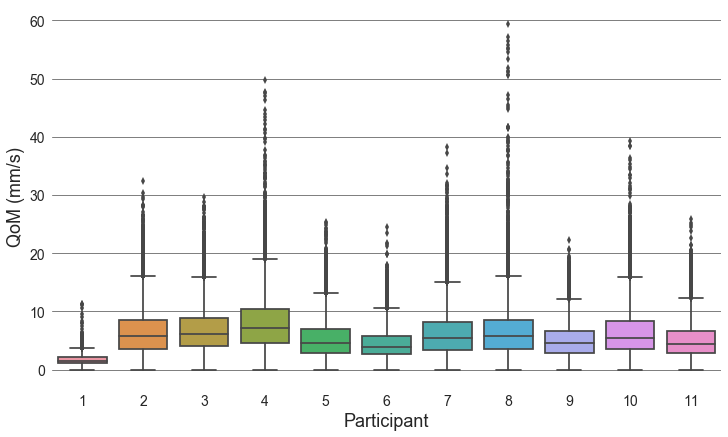

In [93]:
#Box plot of QoM

figbox, axbox = plt.subplots(figsize=(12,7))
qombox = seaborn.boxplot(ax=axbox, data=vels_group[8], width=0.8) #QoM box plot for Group 8
axbox.set_facecolor("white")
axbox.yaxis.grid(color='gray')
qombox.set_xlabel("Participant",fontsize=18)
qombox.set_ylabel("QoM (mm/s)",fontsize=18)
qombox.tick_params(labelsize=14)

### Smoothing velocity
Calculating the envelope of the velocity using a rolling average

In [94]:
#Smoothing the velocity profile for all participants (envelope)
velenv = {}    
velenvx = {}
velenvy = {}
velenvz = {}

for groups in range(1,num_groups+1):
    velenv[groups] = {}
    velenvx[groups] = {}
    velenvy[groups] = {}
    velenvz[groups] = {}
    
    
    for i in range(1,len(nm12[groups])+1):
        velenv[groups][i] = vels_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        
        velenvx[groups][i] = velsx_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvy[groups][i] = velsy_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()
        velenvz[groups][i] = velsz_group[groups][i].rolling(200,center=True,win_type='boxcar',min_periods=1).mean()

In [95]:
#Concatenating smoothed velocity for all participants in each group
vel_env_group = {}
vel_envx_group = {}
vel_envy_group = {}
vel_envz_group = {}

for group_id in range(1,num_groups+1):
    vel_env_group[group_id] = pd.concat(velenv[group_id],1)
    
    vel_envx_group[group_id] = pd.concat(velenvx[group_id],1)
    vel_envy_group[group_id] = pd.concat(velenvy[group_id],1)
    vel_envz_group[group_id] = pd.concat(velenvz[group_id],1)

In [191]:
vel_envx_group[1] #smoothed velocities group 1

,1,2,3,4,5
Time (s),,,,,
0.005000,11.511840,3.839947,8.269885,5.293926,7.141901
0.010000,11.457267,3.821729,8.231569,5.289035,7.191979
0.015000,11.425332,3.790143,8.233219,5.274437,7.144999
0.020000,11.401783,3.764996,8.207653,5.275655,7.131940
0.025000,11.382534,3.765332,8.238347,5.255696,7.124901
0.030000,11.293176,3.750424,8.245600,5.253260,7.089425
0.035000,11.256447,3.792400,8.171585,5.220682,7.064053
0.040001,11.169938,3.799947,8.192410,5.231703,7.059715
0.045001,11.105401,3.777725,8.183220,5.235112,7.031384


Text(0.5, 1.0, 'Velocity (QoM) participant 8_2')

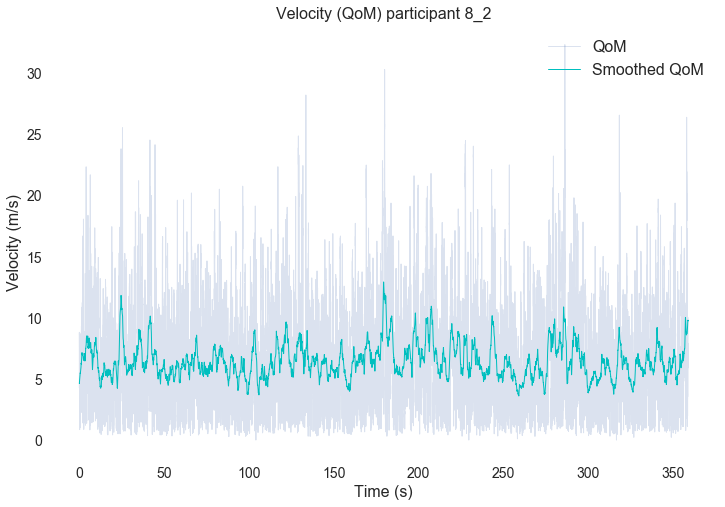

In [96]:
# Raw and smooth velocity plot for one participant

fig, ax = plt.subplots(1)
fig.set_figheight(8)
fig.set_figwidth(12)
ax.set_facecolor("white")
ax.plot(vels_group[8][2], lw=1, label='QoM', alpha=0.2)
ax.plot(velenv[8][2], lw=1, label='Smoothed QoM', color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
ax.legend(loc='upper right', fontsize=16)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('Velocity (m/s)', fontsize=16);
plt.title('Velocity (QoM) participant 8_2', fontsize=16)

Text(0.5, 1.0, 'Velocities from all participants and reference markers in Group 8')

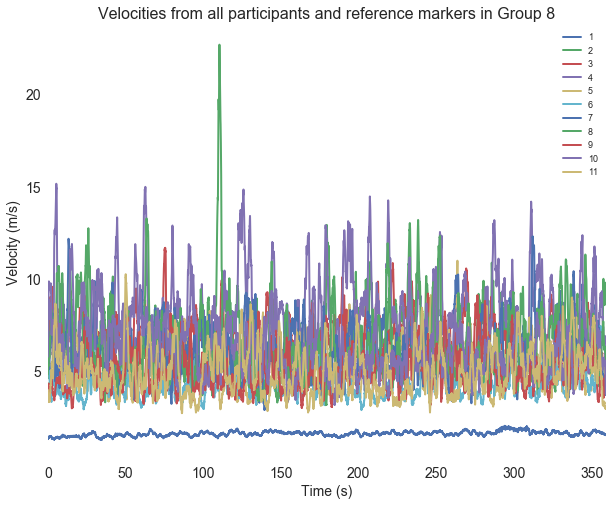

In [97]:
#Plotting all smoothed velocities for one group
ax1 = vel_env_group[8].plot(figsize=(10,8), linewidth=2, fontsize=14)
ax1.set_facecolor("white")
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('Velocity (m/s)', fontsize=14);
plt.legend(loc='upper right', fontsize=9)
plt.title('Velocities from all participants and reference markers in Group 8', fontsize=16)

### Mean of Norm of the Velocity (mean QoM)

In [100]:
#Mean of velocities

for groups in range(1,num_groups+1):
    
    for i in range(1,len(nm12[groups])+1):
        velocities[groups][i].loc['mean'] = velocities[groups][i].mean()

## Segmenting data by conditions and stimuli
Presentation of stimuli was fixed for all groups. All sessions started with 3min of silence followed by 3min of music.

### Segmenting group data based on the order and duration of stimuli

In [102]:
def segments(data):
    #First segment was always Silence - 180s
    #After that:
    #1 - Lento (#3) from György Ligeti’s Ten Pieces for Wind Quintet (20s)
    #2 - Allegro con delicatezza (#8) from György Ligeti’s Ten Pieces for Wind Quintet (15s)
    #3 - Adagio from Joaquin Rodrigo's Concierto de Aranjuez (40s)
    #4 - Winter movement from Vivaldi's The Four Seasons (20s)
    #5 - Left & Right by D'Angelo, featuring Method Man & Redman (35s)
    #6 - Salsa (20s)
    #7 - EDM (30s)
    
    #Total duration of recording 360s
          
    segments = {}
    
    segments[0]= data.iloc[0:18000]
    segments[1]= data.iloc[18000:20000]
    segments[2]= data.iloc[20000:21500]
    segments[3]= data.iloc[21500:25500]
    segments[4]= data.iloc[25500:27500]
    segments[5]= data.iloc[27500:31000]
    segments[6]= data.iloc[31000:33000]
    segments[7]= data.iloc[33000:36000]
    
    
    return segments

### Segmenting raw and smoothed Velocity (QoM)

In [103]:
QoM_segmented = {}
QoMX_segmented = {}
QoMY_segmented = {}
QoMZ_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_segmented[group_id] = segments(vels_group[group_id])
    QoMX_segmented[group_id] = segments(velsx_group[group_id])
    QoMY_segmented[group_id] = segments(velsy_group[group_id])
    QoMZ_segmented[group_id] = segments(velsz_group[group_id])
    
QoM_smooth_segmented = {}
QoMX_smooth_segmented = {}
QoMY_smooth_segmented = {}
QoMZ_smooth_segmented = {}

for group_id in range(1,num_groups+1):
    QoM_smooth_segmented[group_id] = segments(vel_env_group[group_id])
    QoMX_smooth_segmented[group_id] = segments(vel_envx_group[group_id])
    QoMY_smooth_segmented[group_id] = segments(vel_envy_group[group_id])
    QoMZ_smooth_segmented[group_id] = segments(vel_envz_group[group_id])

In [105]:
QoM_segmented[8][0] #Displaying QoM data for group 8, segment 0 (silence)

,1,2,3,4,5,6,7,8,9,10,11
Time (s),,,,,,,,,,,
0.010000,0.424252,4.273053,1.987405,4.571524,2.690650,10.190889,5.481635,0.781003,7.034717,1.378366,10.481120
0.020001,0.616424,5.033745,3.179534,4.327696,1.268822,9.128272,5.738307,2.172496,6.544281,1.187401,10.802477
0.030001,2.004938,8.810543,4.170016,3.981095,2.774810,10.428995,6.747404,2.599928,6.745181,1.252962,9.159439
0.040001,1.356428,4.438345,5.511652,5.241037,1.702891,8.314214,3.449542,2.509910,6.515952,3.602676,8.675011
0.050001,1.319054,6.006496,6.008992,2.994912,5.158344,8.060793,2.513891,1.396385,7.812592,4.342689,8.440144
0.060002,1.307633,5.544212,7.197716,5.835075,4.282403,7.841338,2.655110,3.515581,8.438367,3.042940,9.950602
0.070002,1.256945,6.080949,7.026183,4.061906,5.437679,7.640468,3.833951,2.406175,5.421103,3.626192,7.752203
0.080002,1.539438,6.611926,5.288520,4.439471,4.080327,6.718444,7.631956,1.813785,6.556493,3.813029,8.115807
0.090003,0.969509,7.253073,6.288704,3.302937,4.221257,6.070251,6.197408,1.584254,9.025822,5.154466,6.888930


### Grouping data into silence and music segments

In [134]:
#Odd segments are silence, even segments are music
QoM_segmented_mus = {} #creating empty dictionaries for data during music - raw
QoMX_segmented_mus = {}
QoMY_segmented_mus = {}
QoMZ_segmented_mus = {}

QoM_segmented_sil = {} #creating empty dictionaries for data during silence - raw
QoMX_segmented_sil = {}
QoMY_segmented_sil = {}
QoMZ_segmented_sil = {}

QoM_smooth_segmented_mus = {} #creating empty dictionaries for data during music - smooth
QoMX_smooth_segmented_mus = {}
QoMY_smooth_segmented_mus = {}
QoMZ_smooth_segmented_mus = {}

QoM_smooth_segmented_sil = {}  #creating empty dictionaries for data during silence - smooth
QoMX_smooth_segmented_sil = {}
QoMY_smooth_segmented_sil = {}
QoMZ_smooth_segmented_sil = {}

for group_id in range(1,num_groups+1):
  QoM_segmented_mus[group_id] = {} 
  QoMX_segmented_mus[group_id] = {}
  QoMY_segmented_mus[group_id] = {}
  QoMZ_segmented_mus[group_id] = {}
  
  QoM_segmented_sil[group_id] = {}  
  QoMX_segmented_sil[group_id] = {}
  QoMY_segmented_sil[group_id] = {}
  QoMZ_segmented_sil[group_id] = {}
  
  QoM_smooth_segmented_mus[group_id] = {}  
  QoMX_smooth_segmented_mus[group_id] = {}
  QoMY_smooth_segmented_mus[group_id] = {}
  QoMZ_smooth_segmented_mus[group_id] = {}
  
  QoM_smooth_segmented_sil[group_id] = {}   
  QoMX_smooth_segmented_sil[group_id] = {}
  QoMY_smooth_segmented_sil[group_id] = {}
  QoMZ_smooth_segmented_sil[group_id] = {}
  

  QoM_segmented_sil[group_id] = QoM_segmented[group_id][0] #filling a dictionary with silence
  QoM_smooth_segmented_sil[group_id] = QoM_smooth_segmented[group_id][0]  
  QoMX_segmented_sil[group_id] = QoMX_segmented[group_id][0]  
  QoMX_smooth_segmented_sil[group_id] = QoMX_smooth_segmented[group_id][0]
  QoMY_segmented_sil[group_id] = QoMY_segmented[group_id][0] 
  QoMY_smooth_segmented_sil[group_id] = QoMY_smooth_segmented[group_id][0]
  QoMZ_segmented_sil[group_id] = QoMZ_segmented[group_id][0] 
  QoMZ_smooth_segmented_sil[group_id] = QoMZ_smooth_segmented[group_id][0]
    
    
    
  for i in range (1,8,1):  
    QoM_smooth_segmented_mus[group_id][i] = QoM_smooth_segmented[group_id][i] #filling dictionary with music segments
    QoM_segmented_mus[group_id][i] = QoM_segmented[group_id][i]     
    QoMX_smooth_segmented_mus[group_id][i] = QoMX_smooth_segmented[group_id][i]
    QoMX_segmented_mus[group_id][i] = QoMX_segmented[group_id][i] 
    QoMY_smooth_segmented_mus[group_id][i] = QoMY_smooth_segmented[group_id][i]
    QoMY_segmented_mus[group_id][i] = QoMY_segmented[group_id][i] 
    QoMZ_smooth_segmented_mus[group_id][i] = QoMZ_smooth_segmented[group_id][i]
    QoMZ_segmented_mus[group_id][i] = QoMZ_segmented[group_id][i] 

    
    

In [140]:
QoM_smooth_segmented_mus[2][1] #Smoothed QoM, Group2, first music segment - Ligeti

,1,2,3,4,5,6,7,8,9,10,11
Time (s),,,,,,,,,,,
180.015056,0.0,6.937099,4.574055,11.103825,6.075772,6.807439,6.092713,8.636179,7.462856,5.171393,7.431872
180.025057,0.0,6.925264,4.581457,11.124003,6.059762,6.793471,6.087421,8.621769,7.411875,5.148101,7.376520
180.035057,0.0,6.922439,4.594603,11.150834,6.045212,6.779798,6.075023,8.619769,7.378712,5.122368,7.309360
180.045057,0.0,6.920625,4.578530,11.159549,6.031319,6.755274,6.079760,8.620091,7.332232,5.086474,7.260781
180.055058,0.0,6.943549,4.582446,11.165902,6.025888,6.747783,6.079466,8.634413,7.287306,5.043647,7.192199
180.065058,0.0,6.979472,4.605648,11.157321,6.022410,6.736025,6.073335,8.644297,7.242440,5.008877,7.102051
180.075058,0.0,7.005160,4.615160,11.176967,6.015761,6.732947,6.068198,8.644929,7.197622,4.958583,7.024785
180.085058,0.0,7.009072,4.621201,11.162568,6.014174,6.745983,6.070657,8.657662,7.157271,4.908876,6.953963
180.095059,0.0,7.017010,4.623360,11.151346,6.016320,6.771867,6.061631,8.681132,7.107808,4.860842,6.914972


### Mean QoM for each segment for each participant

In [121]:
# Mean QoM for each participant in each group for each segment

Mean_QoM_segm = {}    

for qoms_group in range(1,num_groups+1):
    Mean_QoM_segm[qoms_group] = {}
    
    for i in range(0,len(QoM_segmented[qoms_group])):
       Mean_QoM_segm[qoms_group][i] = (QoM_segmented[qoms_group][i].mean())
       

In [123]:
Mean_QoM_segm[1][0] #Displaying mean QoM for participants in group 1, segment 0 (Silence)

1     2.086325
2     8.136296
3    11.181882
4     6.478199
5     5.578051
6     5.293612
7     6.394808
8     7.072496
9     7.009064
dtype: float64

## Plotting segmented QoM

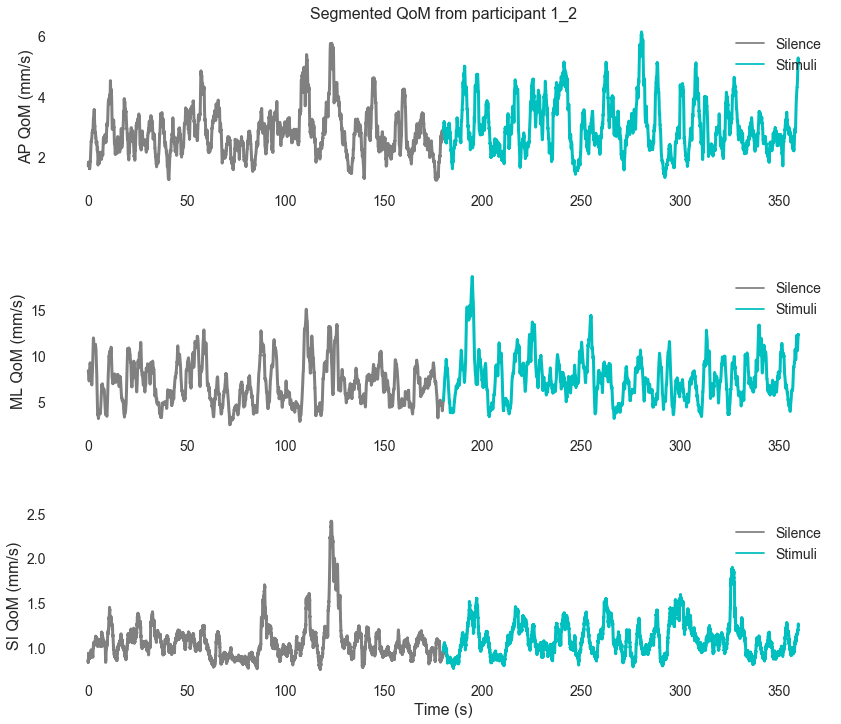

In [142]:
#Plotting segmented QoM in the three directions with color-coded conditions for one participant
f = plt.figure(figsize=(14,12))
hfont = {'fontname':'Helvetica'}

axX = plt.subplot(3, 1, 1)
axX.set_facecolor("white")

plt.title('Segmented QoM from participant 1_2', fontsize=16)


axX.plot(QoMX_smooth_segmented_sil[1][2], 'gray', lw=3, label='_nolegend_') #plotting silence segment participant 1_2
for j in range(1,8):
  axX.plot(QoMX_smooth_segmented_mus[1][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments participant 1_2


  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('AP QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axZ = plt.subplot(3, 1, 2)
axZ.set_facecolor("white")

axZ.plot(QoMY_smooth_segmented_sil[1][2], 'gray', lw=3, label='_nolegend_') #plotting silence segment participant 1_2
for j in range(1,8):
  axZ.plot(QoMY_smooth_segmented_mus[1][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments participant 1_2


plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('ML QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)


axY = plt.subplot(3, 1, 3)
axY.set_facecolor("white")

axY.plot(QoMZ_smooth_segmented_sil[1][2], 'gray', lw=3, label='_nolegend_') #plotting silence segment participant 1_2
for j in range(1,8):
  axY.plot(QoMZ_smooth_segmented_mus[1][j][2], 'c', lw=3, label='_nolegend_') #plotting music segments participant 1_2
  
plt.plot([], label="Silence", color='gray')  
plt.plot([], label="Stimuli", color='c')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('SI QoM (mm/s)', fontsize=16);
plt.legend(loc='upper right', fontsize=14)

plt.subplots_adjust(hspace=0.5)



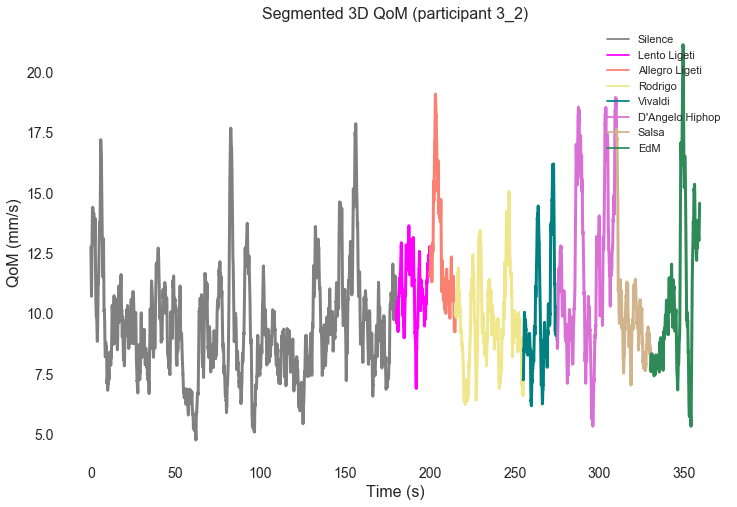

In [147]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant

fig8, ax8 = plt.subplots(1)
fig8.set_figheight(8)
fig8.set_figwidth(12)
ax8.set_facecolor("white")

ax8.plot(QoM_smooth_segmented_sil[4][2], 'gray', lw=3, label='_nolegend_') #plotting silence segments

ax8.plot(QoM_smooth_segmented_mus[4][1][2], 'magenta', lw=3, label='_nolegend_') #plotting  stimuli1
ax8.plot(QoM_smooth_segmented_mus[4][2][2], 'salmon', lw=3, label='_nolegend_') #plotting stimuli2
ax8.plot(QoM_smooth_segmented_mus[4][3][2], 'khaki', lw=3, label='_nolegend_') #plotting stimuli3
ax8.plot(QoM_smooth_segmented_mus[4][4][2], 'teal', lw=3, label='_nolegend_') #plotting stimuli4
ax8.plot(QoM_smooth_segmented_mus[4][5][2], 'orchid', lw=3, label='_nolegend_') #plotting stimuli5
ax8.plot(QoM_smooth_segmented_mus[4][6][2], 'tan', lw=3, label='_nolegend_') #plotting stimuli6
ax8.plot(QoM_smooth_segmented_mus[4][7][2], 'seagreen', lw=3, label='_nolegend_') #plotting stimuli7


plt.plot([], label="Silence", color='gray')

plt.plot([], label="Lento Ligeti", color='magenta')
plt.plot([], label="Allegro Ligeti", color='salmon')
plt.plot([], label="Rodrigo", color='khaki')
plt.plot([], label="Vivaldi", color='teal')
plt.plot([], label="D'Angelo Hiphop", color='orchid')
plt.plot([], label="Salsa", color='tan')
plt.plot([], label="EdM", color='seagreen')

    #1 - Lento (#3) from György Ligeti’s Ten Pieces for Wind Quintet (20s)
    #2 - Allegro con delicatezza (#8) from György Ligeti’s Ten Pieces for Wind Quintet (15s)
    #3 - Adagio from Joaquin Rodrigo's Concierto de Aranjuez (40s)
    #4 - Winter movement from Vivaldi's The Four Seasons (20s)
    #5 - Left & Right by D'Angelo, featuring Method Man & Redman (35s)
    #6 - Salsa (20s)
    #7 - EDM (30s)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Time (s)', fontsize=16);
plt.ylabel('QoM (mm/s)', fontsize=16);
plt.title('Segmented 3D QoM (participant 3_2)', fontsize=16)
plt.legend(loc='upper right', fontsize=11)

## Visualizing the stimuli

In [116]:
#Plotting segmented QoM (norm) with color-coded stimuli for one participant AND stimuli waveforms

#Loading stimuli files with librosa

y1, sr1 = librosa.load('path_lento')
y2, sr2 = librosa.load('path_allegro')
y3, sr3 = librosa.load('path_rodrigo')
y4, sr4 = librosa.load('path_vivaldi')
y5, sr5 = librosa.load('path_hiphop')
y6, sr6 = librosa.load('path_salsa')
y7, sr7 = librosa.load('path_edm')



fig = plt.figure(figsize=(16,12))
grid = plt.GridSpec(20, 7, wspace=0.5, hspace=0.5)


plt.subplot(grid[0:6,0:2])
librosa.display.waveplot(y1, sr=sr1, color='magenta')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[0:6,2:4])
librosa.display.waveplot(y2, sr=sr2, color='salmon')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


plt.subplot(grid[0:6,4:6])
librosa.display.waveplot(y3, sr=sr3, color='khaki')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[7:13,0:2])
librosa.display.waveplot(y4, sr=sr4, color='teal')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[7:13,2:4])
librosa.display.waveplot(y5, sr=sr5, color='orchid')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[7:13,4:6])
librosa.display.waveplot(y6, sr=sr6, color='tan')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))

plt.subplot(grid[14:20,2:4])
librosa.display.waveplot(y7, sr=sr7, color='seagreen')
plt.xlabel('Time (s)', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.ylim((-1,1))


NameError: name 'librosa' is not defined

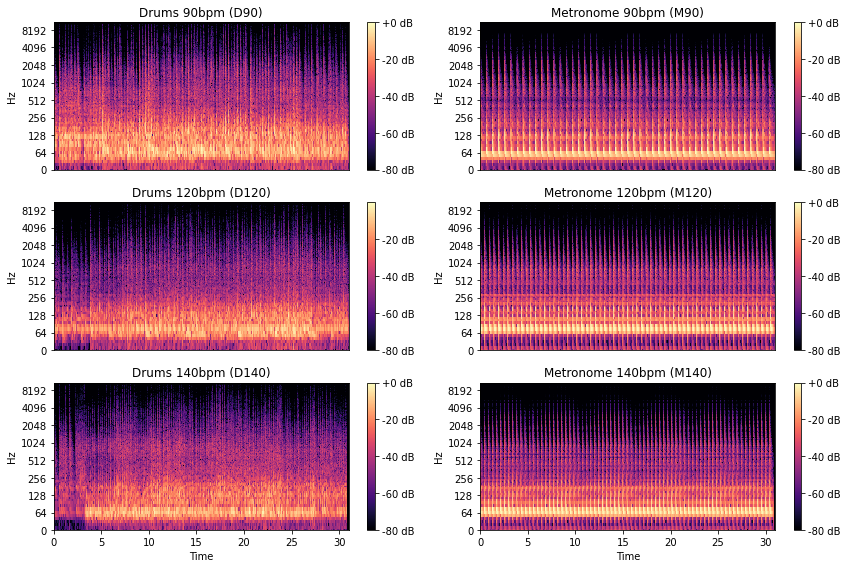

In [ ]:
#Generating spectrograms for all stimuli

D1 = librosa.amplitude_to_db(np.abs(librosa.stft(y1)), ref=np.max)
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y2)), ref=np.max)
D3 = librosa.amplitude_to_db(np.abs(librosa.stft(y3)), ref=np.max)
D4 = librosa.amplitude_to_db(np.abs(librosa.stft(y4)), ref=np.max)
D5 = librosa.amplitude_to_db(np.abs(librosa.stft(y5)), ref=np.max)
D6 = librosa.amplitude_to_db(np.abs(librosa.stft(y6)), ref=np.max)
D7 = librosa.amplitude_to_db(np.abs(librosa.stft(y7)), ref=np.max)


fig = plt.figure(figsize=(12,8))

plt.subplot(3, 3, 1)
librosa.display.specshow(D1, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Lento - Ligeti')

plt.subplot(3, 3, 2)
librosa.display.specshow(D2, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Allegro - Ligeti')

plt.subplot(3, 3, 3)
librosa.display.specshow(D3, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Rodrigo - Aranjuez')

plt.subplot(3, 3, 4)
librosa.display.specshow(D4, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Vivaldi - Winter')

plt.subplot(3, 3, 5)
librosa.display.specshow(D5, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('HipHop')

plt.subplot(3, 3, 6)
librosa.display.specshow(D6, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Salsa')

plt.subplot(3, 3, 7)
librosa.display.specshow(D7, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('EDM')


plt.tight_layout()

fig.savefig("spectrograms_stimuli.pdf", bbox_inches='tight')
